# Bank Marketing 

The aim here is to classify whether a client will subscribe to a term deposit plan or not. (Binary Classification)
Dataset url: https://www.kaggle.com/henriqueyamahata/bank-marketing

In [ ]:
## Performance 
### Hyper parameter tuning:

# xgboost : 0.9460779708783467
# RandomForestClassifier : 0.8956317519962423


### UP SAMPLING and One Hot encoding

# Catboost : 0.9428839830906529
# LightGBM : 0.9457022076092062


### No Up sampling and LabelEncoding

# Catboost : 0.9081063340991139
# LightGBM : 0.9043321299638989


### Voting Classifier ( Logistic Regression, KNN, Decision Tree Classifier)

## Accuracy : 0.9389384687646782

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv(r'E:\MSC BDA SEM 3\Bank Marketing Task\bank-additional-full.csv', sep=';')

In [ ]:
df.drop_duplicates(keep=False, inplace=True) 

In [ ]:
columns = df.columns.tolist()
numerical = [feature for feature in columns if df[feature].dtypes!='O']
categorical = [feature for feature in columns if feature not in numerical]
polychotomus = [feature for feature in categorical if feature not in ['default','housing','loan','contact','y']]

## Preprocessing  

### Missing Values ( Unknown, 999 ) 

The Dataset contains missing values in categorical varaibles as "Unknown" and in numerical variables as "999" 

In [ ]:
for feature in columns:
    df[feature] = np.where(df[feature]=='unknown',np.nan,df[feature])

C:\Users\test\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
## Missing values in Categorical

def Missing(df,columns):
    missing = []
    for feature in columns:
        missing_val = np.round(df[feature].isna().sum()/len(df), 3)*100
        missing.append([feature, missing_val])
    miss_df = pd.DataFrame(missing, columns=['Feature', '% Missing'])
    miss_df = miss_df[miss_df['% Missing'] != 0]
    return miss_df

In [ ]:
Missing(df, columns)

,Feature,% Missing
1,job,0.8
2,marital,0.2
3,education,4.2
4,default,20.9
5,housing,2.4
6,loan,2.4


In [ ]:
# Missing values in Numerical

count_999 = []
for feature in numerical:
    if (999 in df[feature].unique()):
        count_val = np.round((df[feature].value_counts()[999]/len(df[feature])),4)*100
        count_999.append([feature, count_val])
    else:
        pass
pd.DataFrame(count_999, columns=['Feature', '% Missing'])

,Feature,% Missing
0,duration,0.00
1,pdays,96.32


pdays and default have 96.32 and 20.9 percent missing values respectively hence need to drop these two columns. Also the rest of the columns having missing values, the rows have been dropped.

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.drop(['pdays','default'],axis=1, inplace=True)
columns.remove('pdays')
columns.remove('default')

In [ ]:
numerical = [feature for feature in columns if df[feature].dtypes!='O']
categorical = [feature for feature in columns if feature not in numerical]
polychotomus = [feature for feature in categorical if feature not in ['housing','loan','contact','y']]

### Unique Values  

In [ ]:
def unique(df, column):
    unique_vals = []
    for feature in column:
        val1 = df[feature].nunique()
        unique_vals.append([feature, val1])
    unique_df = pd.DataFrame(unique_vals, columns=['Feature', 'No. Unique'])

    return unique_df

In [ ]:
## Numerical Variables Describe
def describe_num(df,numerical):
    vals = []
    for feature in numerical:
        feat_des = [feature, df[feature].nunique(),np.round(df[feature].mean(),2), min(df[feature]),
                    np.quantile(df[feature],0.25),np.quantile(df[feature],0.5),np.quantile(df[feature],0.75),
                    max(df[feature])]
        vals.append(feat_des)
    desc_num = pd.DataFrame(vals, columns=['Feature','No. Unique','Mean','Min','Q1','Q2','Q3','Max'])
    return desc_num

In [ ]:
describe_num(df,numerical)

,Feature,No. Unique,Mean,Min,Q1,Q2,Q3,Max
0,age,76,39.03,17.000,31.000,37.000,45.000,95.000
1,duration,1441,259.54,0.000,103.000,181.000,321.000,4918.000
2,campaign,41,2.52,1.000,1.000,2.000,3.000,43.000
3,previous,8,0.19,0.000,0.000,0.000,0.000,7.000
4,emp.var.rate,10,-0.07,-3.400,-1.800,1.100,1.400,1.400
5,cons.price.idx,26,93.52,92.201,93.075,93.444,93.994,94.767
6,cons.conf.idx,26,-40.60,-50.800,-42.700,-41.800,-36.400,-26.900
7,euribor3m,314,3.46,0.634,1.313,4.856,4.961,5.045
8,nr.employed,11,5160.81,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
unique(df, categorical)

,Feature,No. Unique
0,job,11
1,marital,3
2,education,7
3,housing,2
4,loan,2
5,contact,2
6,month,10
7,day_of_week,5
8,poutcome,3
9,y,2


## Exploratory Data Analysis 

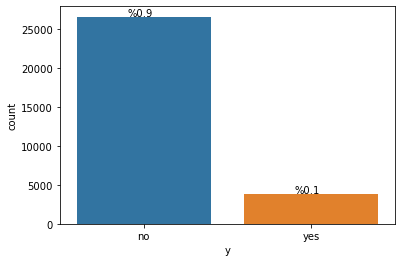

In [ ]:
ax = sns.countplot(df['y'])
for p in ax.patches:
        ax.annotate('%{:.1f}'.format(np.round(p.get_height()/len(df),3)), (p.get_x()+0.3, p.get_height()+100))

Dataset is highly imbalanced 9:1

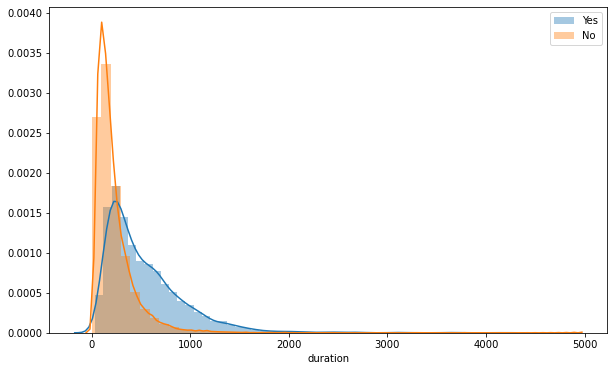

In [ ]:
## Duration among the people who have and haven't agreed to the plan

plt.figure(figsize=(10,6))
sns.distplot(df[df['y']=='yes']['duration'])
sns.distplot(df[df['y']=='no']['duration'])
plt.legend(labels=['Yes','No'])
plt.show()

Clients who have agreed for a term deposit plan tend to have a larger duration of conversation. Probably to get to know more about the details of the term deposit plan. On the other hand, the clients who are not interested donot attend the call for a long duration

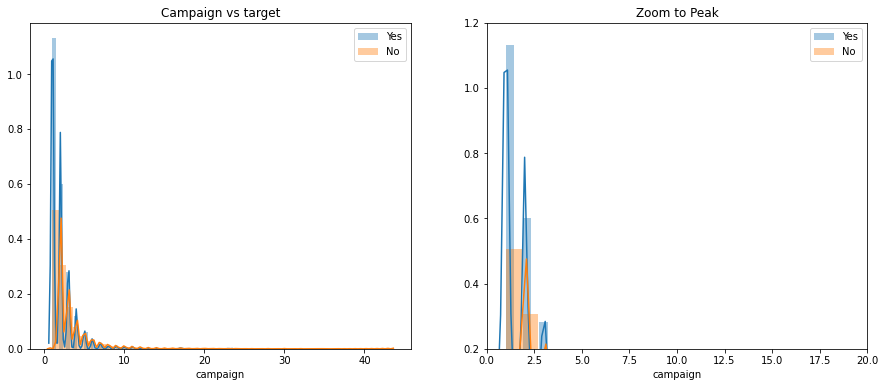

In [ ]:
plt.figure(figsize=(15,6))


plt.subplot(1,2,1)
sns.distplot(df[df['y']=='yes']['campaign'])
sns.distplot(df[df['y']=='no']['campaign'])
plt.title('Campaign vs target')
plt.legend(labels=['Yes','No'])

plt.subplot(1,2,2)
sns.distplot(df[df['y']=='yes']['campaign'])
sns.distplot(df[df['y']=='no']['campaign'])
plt.title('Zoom to Peak')
plt.xlim([0,20])
plt.ylim([0.2,1.2])
plt.legend(labels=['Yes','No'])

plt.show()

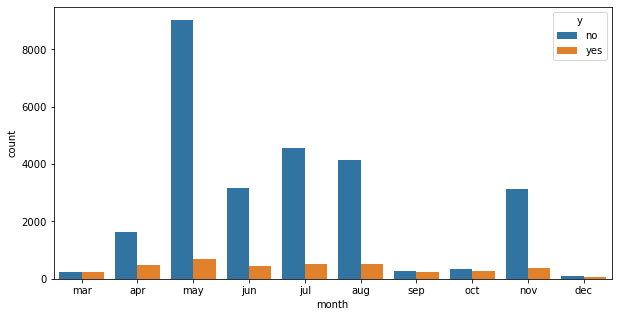

In [ ]:
## Month 

plt.figure(figsize=(10,5))
sns.countplot(df['month'], order=['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], hue=df['y'])
plt.show()

Most Employees have been contacted in May followed by July, August and then June. The percent of people agreeing to a Term deposit plan are also significantly large as compared in other months. 

## Feature Engineering

### Feature Creation 

In [ ]:
# Age Bin

def feat_creat(df):
    ## Age Binn
    age_bin = []
    for val in df['age']:
        if (val <= 32):
            age_bin.append(1)
        elif (val>32 and val<=38):
            age_bin.append(2)
        elif (val>38 and val<=47):
            age_bin.append(3)
        else:
            age_bin.append(4)
    df['Age_Bin'] = age_bin

In [ ]:
## Principal Component Analysis

pca = PCA(n_components=1)

pca.fit(df[numerical])
l1 = pca.transform(df[numerical])
df['PCA'] = l1

feat_creat(df)

### Encoding 

In [ ]:
## Housing, Loan : Dichotomus (yes, no)

map_dichot = {'yes':1,'no':0}
for feature in ['housing','loan','y']:
    df[feature] = df[feature].map(map_dichot)

## Contact : Dichotomus (Telephone, cellular)
df['contact'] = df['contact'].map({'telephone':1,'cellular':0})


In [ ]:
## df1 = label Encoding
## df2 = one hot encoding

df1 = df.copy()
df2 = df.copy()

In [ ]:
## Label Encoding Polychotomus Features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for feature in polychotomus:
    df1[feature] = le.fit_transform(df1[feature])

In [ ]:
## One Hot Encoding Categorical Features

df2 = pd.get_dummies(df, columns=polychotomus, drop_first=True)

### Upsampling using Smote 

In [ ]:
## Label Encoded variables

x1 = df1.drop(['y'],axis=1)
y1 = df1['y']

In [ ]:
## One Hot Encoded Variables

x2 = df2.drop(['y'],axis=1)
y2 = df2['y']

In [ ]:
from imblearn.over_sampling import SMOTE

SMOTE_OBJ = SMOTE()
xu,yu = SMOTE_OBJ.fit_sample(x2,y2)### Imp note hereee 

## Modelling 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import classification_report

In [ ]:
### UP SAMPLING TRAIN TEST SPLIT

x_train,x_test,y_train,y_test = train_test_split(xu,yu,test_size=0.2,random_state=42)

### Random Forest  and XGBoost Hyperparameter tuning 

#### XGBoost 

In [ ]:
## XGB

xgb = XGBClassifier()

param_grid = dict(learning_rate = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                  boosting_type=['gbdt','dart','goss','rf'],
                 n_estimators=[100, 200, 350, 400])
xgb_ran = RandomizedSearchCV(xgb, param_grid, cv=5, n_jobs=-1)

In [ ]:
xgb_ran.fit(x_train, y_train)

[18:54:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosting_type } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                          

In [ ]:
xgb_ran.score(x_test, y_test)

0.9460779708783467

In [ ]:
print(xgb_ran.best_params_)

{'n_estimators': 400, 'learning_rate': 0.15, 'boosting_type': 'gbdt'}


In [ ]:
pickle.dump(xgb_ran, open("E:/MSC BDA SEM 3/Bank Marketing Task/xgb_ran_hyp.pkl",'wb'))

In [ ]:
xgb_ran = pickle.load(open("E:/MSC BDA SEM 3/Bank Marketing Task/xgb_ran_hyp.pkl",'rb'))

In [ ]:
pred_xgb = xgb_ran.predict(x_test)

In [ ]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5278
           1       0.95      0.94      0.95      5367

    accuracy                           0.95     10645
   macro avg       0.95      0.95      0.95     10645
weighted avg       0.95      0.95      0.95     10645



#### Random Forest 

In [ ]:
## RFC

random_grid = {'n_estimators': [100,200,400,300],
               'max_features': ['auto','sqrt'],
               'max_depth': [1, 3, 5],
               'min_samples_split': [5,10,15]}

rfc_ran = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, 
                               n_iter = 7, cv = 5, random_state=42, n_jobs = -1)

In [ ]:
rfc_ran.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=7,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 5],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [100, 200, 400, 300]},
                   random_state=42)

In [ ]:
print(rfc_ran.best_params_)

{'n_estimators': 400, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 5}


In [ ]:
pickle.dump(rfc_ran, open("E:/MSC BDA SEM 3/Bank Marketing Task/rfc_ran_hyp.pkl",'wb'))

In [ ]:
rfc_ran = pickle.load(open("E:/MSC BDA SEM 3/Bank Marketing Task/rfc_ran_hyp.pkl","rb"))

In [ ]:
rfc_ran.score(x_test, y_test)

0.8956317519962423

In [ ]:
pred_rfc = rfc_ran.predict(x_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      5278
           1       0.86      0.94      0.90      5367

    accuracy                           0.90     10645
   macro avg       0.90      0.90      0.90     10645
weighted avg       0.90      0.90      0.90     10645



### Upsampling and One Hot Encoding

#### Catboost  

In [ ]:
## cat boost upsampling

cat = CatBoostClassifier()
cat.fit(x_train,y_train)

Learning rate set to 0.05112
0:	learn: 0.6385107	total: 258ms	remaining: 4m 17s
1:	learn: 0.5930022	total: 283ms	remaining: 2m 21s
2:	learn: 0.5534247	total: 304ms	remaining: 1m 41s
3:	learn: 0.5188584	total: 325ms	remaining: 1m 20s
4:	learn: 0.4928691	total: 346ms	remaining: 1m 8s
5:	learn: 0.4674434	total: 368ms	remaining: 1m
6:	learn: 0.4452523	total: 390ms	remaining: 55.3s
7:	learn: 0.4271523	total: 413ms	remaining: 51.2s
8:	learn: 0.4097073	total: 436ms	remaining: 48s
9:	learn: 0.3886918	total: 468ms	remaining: 46.3s
10:	learn: 0.3730056	total: 494ms	remaining: 44.4s
11:	learn: 0.3616646	total: 518ms	remaining: 42.6s
12:	learn: 0.3527856	total: 540ms	remaining: 41s
13:	learn: 0.3408701	total: 561ms	remaining: 39.5s
14:	learn: 0.3331890	total: 584ms	remaining: 38.4s
15:	learn: 0.3220784	total: 617ms	remaining: 37.9s
16:	learn: 0.3158197	total: 643ms	remaining: 37.2s
17:	learn: 0.3096502	total: 665ms	remaining: 36.3s
18:	learn: 0.3029590	total: 696ms	remaining: 36s
19:	learn: 0.2982

In [ ]:
cat.score(x_test, y_test)

0.9428839830906529

In [ ]:
pred_cat = cat.predict(x_test)
print(classification_report(y_test, pred_cat))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5278
           1       0.95      0.94      0.94      5367

    accuracy                           0.94     10645
   macro avg       0.94      0.94      0.94     10645
weighted avg       0.94      0.94      0.94     10645



#### LGBM 

In [ ]:
lgb = LGBMClassifier()
lgb.fit(x_train, y_train)

LGBMClassifier()

In [ ]:
lgb.score(x_test, y_test)

0.9457022076092062

In [ ]:
pred_lgb = lgb.predict(x_test)
print(classification_report(y_test, pred_lgb))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5278
           1       0.95      0.95      0.95      5367

    accuracy                           0.95     10645
   macro avg       0.95      0.95      0.95     10645
weighted avg       0.95      0.95      0.95     10645



In [ ]:
lgb_featimp = pd.DataFrame(lgb.feature_importances_, index=x_train.columns).sort_values(by=0,ascending=False)

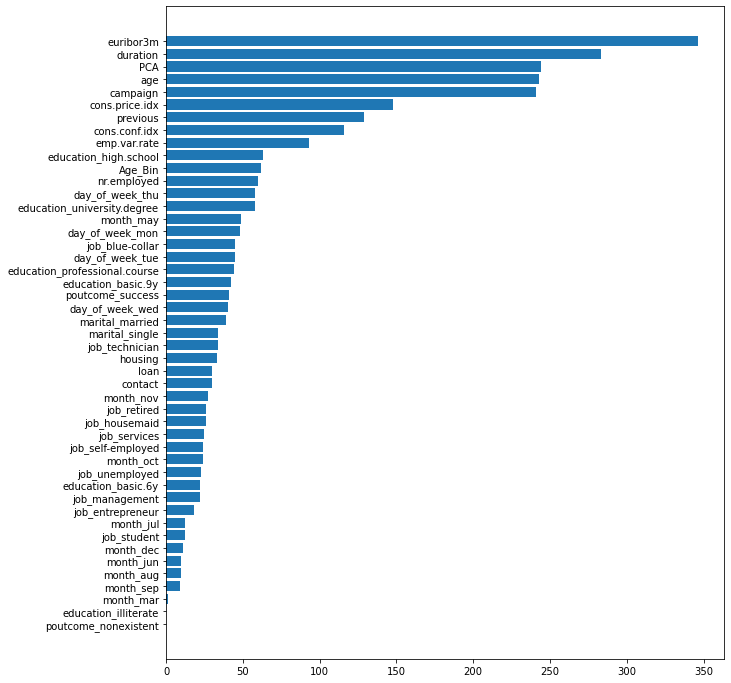

In [ ]:
## Feature importance LGBM

plt.figure(figsize=(10,12))
sort_lgb = lgb.feature_importances_.argsort()
plt.barh(x_train.columns[sort_lgb], lgb.feature_importances_[sort_lgb])
plt.show()

#### Voting Classifier 

In [ ]:
estimator = [] 
estimator.append(('LR',  
                  LogisticRegression(max_iter = 10000))) 
estimator.append(('KNN', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ))) 
estimator.append(('DTC', DecisionTreeClassifier())) 

In [ ]:
vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 

In [ ]:
vot_soft.fit(x_train, y_train)

VotingClassifier(estimators=[('LR', LogisticRegression(max_iter=10000)),
                             ('KNN', KNeighborsClassifier()),
                             ('DTC', DecisionTreeClassifier())],
                 voting='soft')

In [ ]:
vot_soft.score(x_test, y_test)

0.9389384687646782

In [ ]:
pred_vot_soft = vot_soft.predict(x_test)
print(classification_report(y_test, pred_vot_soft))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      5278
           1       0.92      0.96      0.94      5367

    accuracy                           0.94     10645
   macro avg       0.94      0.94      0.94     10645
weighted avg       0.94      0.94      0.94     10645



### No upsampling technique used and Label Encoded

In [ ]:

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

#### Catboost 

In [ ]:
cat.fit(x1_train, y1_train)

Learning rate set to 0.040286
0:	learn: 0.6195727	total: 29.2ms	remaining: 29.1s
1:	learn: 0.5658136	total: 53.9ms	remaining: 26.9s
2:	learn: 0.5240560	total: 74.2ms	remaining: 24.7s
3:	learn: 0.4894272	total: 96.2ms	remaining: 23.9s
4:	learn: 0.4535505	total: 116ms	remaining: 23.1s
5:	learn: 0.4281995	total: 139ms	remaining: 23s
6:	learn: 0.4049760	total: 159ms	remaining: 22.6s
7:	learn: 0.3813578	total: 186ms	remaining: 23.1s
8:	learn: 0.3614208	total: 208ms	remaining: 22.9s
9:	learn: 0.3475701	total: 229ms	remaining: 22.6s
10:	learn: 0.3333573	total: 254ms	remaining: 22.8s
11:	learn: 0.3230448	total: 277ms	remaining: 22.8s
12:	learn: 0.3123690	total: 304ms	remaining: 23.1s
13:	learn: 0.3016555	total: 324ms	remaining: 22.8s
14:	learn: 0.2927591	total: 345ms	remaining: 22.7s
15:	learn: 0.2832380	total: 365ms	remaining: 22.5s
16:	learn: 0.2754900	total: 391ms	remaining: 22.6s
17:	learn: 0.2711581	total: 411ms	remaining: 22.4s
18:	learn: 0.2671381	total: 434ms	remaining: 22.4s
19:	learn

In [ ]:
print("Accuracy : ", cat.score(x1_test, y1_test),"\n")
print(classification_report(y1_test, cat.predict(x1_test)))


Accuracy :  0.9081063340991139 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5302
           1       0.67      0.57      0.62       792

    accuracy                           0.91      6094
   macro avg       0.81      0.76      0.78      6094
weighted avg       0.90      0.91      0.90      6094



#### LGBM

In [ ]:
lgb.fit(x1_train, y1_train)

LGBMClassifier()

In [ ]:
print("Accuracy : ", lgb.score(x1_test, y1_test),"\n")
print(classification_report(y1_test, lgb.predict(x1_test)))

Accuracy :  0.9043321299638989 

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      5302
           1       0.66      0.55      0.60       792

    accuracy                           0.90      6094
   macro avg       0.80      0.76      0.77      6094
weighted avg       0.90      0.90      0.90      6094



In [ ]:
### Hyper parameter tuning:

# xgboost : 0.9460779708783467
# RandomForestClassifier : 0.8956317519962423


### UP SAMPLING and One Hot encoding

# Catboost : 0.9428839830906529
# LightGBM : 0.9457022076092062


### No Up sampling and LabelEncoding

# Catboost : 0.9081063340991139
# LightGBM : 0.9043321299638989


### Voting Classifier ( Logistic Regression, KNN, Decision Tree Classifier)

## Accuracy : 0.9389384687646782